### 1. 문제 정의(목표)
- 500명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자.

### 2. 데이터 수집
- 기존에 있는 데이터를 로드

In [3]:
import pandas as pd
# matplotlib.pyplot : 데이터 시각화 기능을 담당하는 라이브러리
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # KNN 모델 임포트
from sklearn import metrics # 평가를 위한 모듈 임포트

In [4]:
# index_col : 데이터프레임에서 인덱스가 되는 '열'을 설정
tbl = pd.read_csv('data/bmi_500.csv', index_col='Label')
tbl

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


### 3. 데이터 전처리
- 전처리가 필요 없는 데이터

### 4. 탐색적 데이터 분석(시각화)

In [3]:
# Label 값이 'Normal'인 행들만 출력
tbl.loc['Normal']

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


In [4]:
# tbl 데이터 프레임에 대한 정보 출력
# Column : 열(Column) 이름, Non-Null Count : 결측치 여부
# Dtype : 컬럼별 정보(object : 범주형(문자형) 데이터, int64 : 수치형 데이터)
tbl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 25.6+ KB


In [5]:
# 수치형 데이터들의 기술 통계를 확인
tbl.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [6]:
# index의 고유값들을 표기
tbl.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

### 각 비만도 등급별로 시각화

In [8]:
# Label 값과 색상을 매개변수로 받는 함수 myScatter를 생성
def myScatter(label_1, color):
    # loc를 활용하여 각 Label 값들을 tmp 변수에 저장
    tmp = tbl.loc[label_1]
    # 산점도를 표시(산점도 : 점으로 그래프를 표현하는 방식)
    plt.scatter(tmp['Weight'],
               tmp['Height'],
               c = color, # 색상을 설정
               label = label_1) # label : label_1에 들어오는 값을 설정

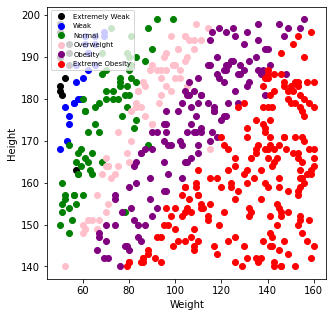

In [12]:
# 그래프의 가로, 세로 크기를 설정
plt.figure(figsize=(5, 5))

# 작성된 함수에 Label값과 색생 값을 넣어주기
myScatter('Extremely Weak', 'black')
myScatter('Weak', 'blue')
myScatter('Normal', 'green')
myScatter('Overweight', 'pink')
myScatter('Obesity', 'purple')
myScatter('Extreme Obesity', 'red')

# 우측 상단에 범례를 표시 (upper, center, lower), (left, center, right)
# prop={'size' : 7} : 범례 크기 조절
plt.legend(loc='upper left', prop={'size' : 7})
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

### 5. 모델링(모델선택, 학습, 평가
1. 문제와 답으로 분리
2. 훈련 셋과 평가 셋으로 분리
3. 학습 및 평가

In [15]:
data = pd.read_csv('data/bmi_500.csv')
data.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [16]:
# 문제 데이터 설정
X = data.loc[:, 'Height':'Weight']
# 정답 데이터 설정
y = data.loc[:, 'Label']

In [17]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [18]:
X

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [19]:
y

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 500, dtype: object

일반적으로 학습 데이터와 평가 데이터의 비율은 7 : 3

In [24]:
# 문제 데이터의 학습 데이터
X_train = X.iloc[:350, :]
# 문제 데이터의 평가 데이터
X_test = X.iloc[350:, :]
# 정답 데이터의 학습 데이터
y_train = y.iloc[:350]
# 정답 데이터의 평가 데이터
y_test = y.iloc[350:]

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 2)
(150, 2)
(350,)
(150,)


In [27]:
# knn 모델 불러오기
knn_model = KNeighborsClassifier(n_neighbors=10)

In [28]:
# 불러온 knn 모델로 학습시키기(train 데이터들을 사용)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [29]:
# test 문제 데이터로 예측
pre = knn_model.predict(X_test)

In [30]:
# 정확도(모델의 성능) 확인
metrics.accuracy_score(pre, y_test)

0.9333333333333333

### 학습된 모델에 내 키와 몸무게를 넣어서 확인해보기

In [31]:
print(knn_model.predict([[175, 67]]))

['Normal']
